## 多層ニューラルネットワーク (隠れ層１つの例）

### テストデータの準備

/Users/pyente/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


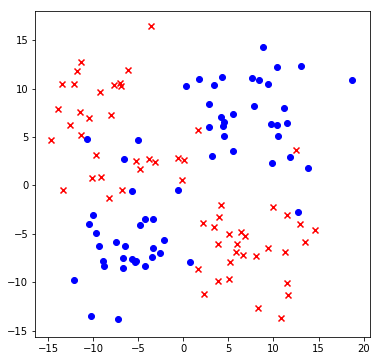

In [1]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data_set = pd.read_csv('http://www.lighthouselab.co.jp/python/anaconda/test_data2.csv',index_col=0)
data0 = data_set[data_set['t']==0]
data1 = data_set[data_set['t']==1]

fig = plt.figure(figsize=(6,6))
plt.scatter(data0.x1, data0.x2, c='r', marker='x')
plt.scatter(data1.x1, data1.x2, c='b',marker='o')
plt.show()

In [2]:
print(data_set)

            x1         x2  t
0     2.846101   6.016084  1
1     5.476809   3.529059  1
2     8.095267  -7.243145  0
3    11.631952 -11.277452  0
4     3.457370  10.340090  1
5   -11.415622   7.556737  0
6   -13.336106  -0.513129  0
7    -9.738736   3.102543  0
8   -13.509872  10.472570  0
9     4.131628  -2.049051  0
10   -4.856893  -4.098957  1
11   -3.315314  -6.468589  1
12   -0.554719   2.782316  0
13    9.709714   6.318125  1
14   -3.608504  16.498881  0
15   -4.259899  -8.363673  1
16   -3.126381   2.372991  0
17   -3.517735  -7.415616  1
18   11.247428  -6.894630  0
19   -6.616372   2.706065  1
20   -7.027859  10.528617  0
21   10.340691   6.279456  1
22   -5.274216  -7.758238  1
23    4.267485  11.239149  1
24  -10.189145 -13.515704  1
25   -3.825806   2.746046  0
26  -11.772453  11.850777  0
27   11.196365   8.012634  1
28  -12.163151  -9.796890  1
29   -9.328597  -6.243442  1
..         ...        ... ..
90   -7.269150 -13.796336  1
91    0.107385   2.657258  0
92   12.507828

### 計算モデル

In [3]:
train_x = data_set[['x1','x2']].as_matrix()
train_t = data_set['t'].as_matrix().reshape([len(data_set), 1])

num_units = 2

#入力データ
x = tf.placeholder(tf.float32, [None, 2],name='x')

#重み
w1 = tf.Variable(tf.truncated_normal([2, num_units]))

#バイアス(入力→隠れ層)
b1 = tf.Variable(tf.zeros([num_units]))
#隠れ層
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1)

#重み(隠れ層→出力層)
w0 = tf.Variable(tf.zeros([num_units, 1]))
#バイアス
b0 = tf.Variable(tf.zeros([1]))
#シグモイド関数
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0)

t = tf.placeholder(tf.float32, [None, 1],name='t')
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


### 計算実行

In [4]:
sess = tf.InteractiveSession()

tf.global_variables_initializer().run()


feed_dict={x:train_x, t:train_t} 
for i in range(10000):
    sess.run(train_step, feed_dict={x:train_x, t:train_t,})
    if i % 1000 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict={x:train_x, t:train_t,})
        print ('Step:',i,'Loss:',loss_val, 'Accuracy:',acc_val)

        
w0,w1,b0,b1 = sess.run([w0,w1,b0,b1])
print('w0',w0)
print('b0',b0)
print('w1',w1)
print('b1',b1)

Step: 0 Loss: 83.17743 Accuracy: 0.5
Step: 1000 Loss: 82.81325 Accuracy: 0.525
Step: 2000 Loss: 65.53337 Accuracy: 0.5083333
Step: 3000 Loss: 64.51817 Accuracy: 0.65833336
Step: 4000 Loss: 64.34866 Accuracy: 0.65833336
Step: 5000 Loss: 64.24898 Accuracy: 0.6666667
Step: 6000 Loss: 64.17836 Accuracy: 0.675
Step: 7000 Loss: 64.12567 Accuracy: 0.675
Step: 8000 Loss: 64.08501 Accuracy: 0.675
Step: 9000 Loss: 64.052765 Accuracy: 0.675
w0 [[-1.0654056]
 [-2.7107208]]
b0 [-1.709912]
w1 [[ 3.347412   -0.28873715]
 [ 0.6501022   0.171918  ]]
b1 [ 1.7389016 -2.692369 ]


 ### 結果表示

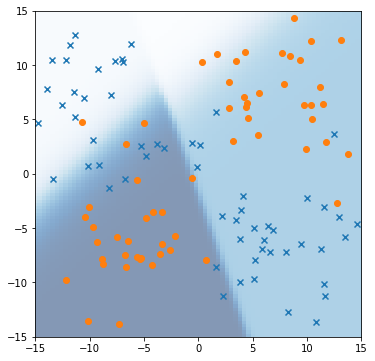

In [5]:
%matplotlib inline


fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(data0.x1, data0.x2, marker='x')
subplot.scatter(data1.x1, data1.x2, marker='o')

locations = []
for x2 in np.linspace(-20,20,100):
    for x1 in np.linspace(-15,15,100):
        locations.append((x1,x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(-20,20,-15,15),
               cmap=plt.cm.Blues, alpha=0.5)

sess.close()

<hr/>
## 隠れ層を2層にした例

### 隠れ層を２層にして、それぞれの層のノード数は４

In [6]:
num_units1 = 4
num_units2 = 4


x = tf.placeholder(tf.float32, [None, 2],name='x')

#隠れ層1層目
w1 = tf.Variable(tf.truncated_normal([2, num_units1]))
b1 = tf.Variable(tf.zeros([num_units1]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1)


#隠れ層2層目
w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(hidden1, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 1]))
b0 = tf.Variable(tf.zeros([1]))

p = tf.nn.sigmoid(tf.matmul(hidden2, w0) + b0)


t = tf.placeholder(tf.float32, [None, 1],name='t')
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))

train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
tf.global_variables_initializer().run()

i = 0
for _ in range(2000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t,})
    if i % 100 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict={x:train_x, t:train_t,})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 80.007301, Accuracy: 0.550000
Step: 200, Loss: 67.822464, Accuracy: 0.725000
Step: 300, Loss: 58.306046, Accuracy: 0.766667
Step: 400, Loss: 46.032257, Accuracy: 0.891667
Step: 500, Loss: 37.103905, Accuracy: 0.916667
Step: 600, Loss: 30.535589, Accuracy: 0.941667
Step: 700, Loss: 29.374880, Accuracy: 0.933333
Step: 800, Loss: 25.013790, Accuracy: 0.933333
Step: 900, Loss: 23.660286, Accuracy: 0.941667
Step: 1000, Loss: 22.614986, Accuracy: 0.941667
Step: 1100, Loss: 21.675066, Accuracy: 0.950000
Step: 1200, Loss: 20.662922, Accuracy: 0.950000
Step: 1300, Loss: 19.828423, Accuracy: 0.950000
Step: 1400, Loss: 19.186108, Accuracy: 0.950000
Step: 1500, Loss: 18.688921, Accuracy: 0.950000
Step: 1600, Loss: 18.293953, Accuracy: 0.950000
Step: 1700, Loss: 17.971037, Accuracy: 0.950000
Step: 1800, Loss: 17.696964, Accuracy: 0.950000
Step: 1900, Loss: 17.453154, Accuracy: 0.950000
Step: 2000, Loss: 17.223515, Accuracy: 0.950000


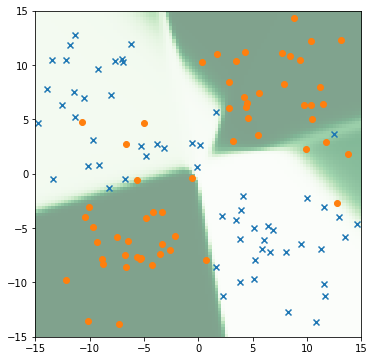

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(data0.x1, data0.x2, marker='x')
subplot.scatter(data1.x1, data1.x2, marker='o')

locations = []
for x2 in np.linspace(-15,15,100):
    for x1 in np.linspace(-15,15,100):
        locations.append((x1,x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(-15,15,-15,15),
               cmap=plt.cm.Greens, alpha=0.5)